In [1]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud

import spacy

In [9]:
nlp = spacy.load('en_core_web_sm')


In [6]:
from spacy.cli import download

In [8]:
download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [23]:
from textblob import TextBlob
from pattern.en import sentiment

In [11]:
r=requests.get('https://www.newsy.com/stories/commercial-companies-advance-space-exploration/')

In [12]:
#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

In [13]:
html = r.text

In [14]:
# Printing the first 500 characters in html
print(html[:500])

<!DOCTYPE html><html lang="en"><head><!-- Google Analytics --><script>
            (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
            (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
            m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
            })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

            ga('create', 'UA-5101570-1', 'auto');
           


In [15]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

# Getting the text out of the soup
text = soup.get_text()

In [16]:
#total length
len(text)

4689

In [17]:
#having a look at the text

print(text[100:1100])

e/HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us





Science and HealthHow Commercial Companies Are Advancing Space ExplorationThere's competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAArticle by Clayton SandellFacebook ShareTweetEmailSMSOctober 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the 'Starship' lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musk's mission-to-Mars dreams a reality."He says, 'I want to die on Mars, just not on impact,'" editor for Spaceref.com Keith Cowing said. "I've known Elon forever, for like 20 years. I met him when he was actua

In [18]:
clean_text= text.replace("\n", " ")

In [19]:
clean_text= clean_text.replace("/", " ")    

In [20]:
clean_text

'Commercial Companies Advance Space Exploration (VIDEO)     newsynewsU.S. NewsWorldLifePoliticsScience HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us      Science and HealthHow Commercial Companies Are Advancing Space ExplorationThere\'s competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAArticle by\xa0Clayton SandellFacebook ShareTweetEmailSMSOctober 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the \'Starship\' lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musk\'s mission-to-Mars dreams a reality."He says, \'I want to die on Mars, just not on impact,\'" edito

In [21]:
clean_text= ''.join([c for c in clean_text if c != "\'"])

In [22]:
sentence=[]


tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [24]:
sentence

['Commercial Companies Advance Space Exploration (VIDEO)',
 'newsynewsU.S. NewsWorldLifePoliticsScience HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us      Science and HealthHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a dozen private companies to launch new space stations.',
 'How Commercial Companies Are Advancing Space ExplorationNASAArticle by\xa0Clayton SandellFacebook ShareTweetEmailSMSOctober 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.',
 'Newly released video shows the Starship lifting into an aerial ballet of flips and turns before landing again.',
 'SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musks mission-to-Mars dreams a reality.',
 '"He says, I want to die on Mars, just not on impact

In [25]:
print(len(sentence))

37


In [26]:
print(sentence[2])

How Commercial Companies Are Advancing Space ExplorationNASAArticle by Clayton SandellFacebook ShareTweetEmailSMSOctober 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.


In [27]:
textblob_sentiment=[]

for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    
    textblob_sentiment.append([s,a,b])

In [28]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity']) 

In [29]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.000000,0.000000
1,newsynewsU.S. NewsWorldLifePoliticsScience Hea...,0.009091,0.307386
2,How Commercial Companies Are Advancing Space E...,0.040000,0.600000
3,Newly released video shows the Starship liftin...,0.136364,0.454545
4,SpaceX hopes the ship will reach orbit for the...,0.125000,0.166667


In [30]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      37 non-null     object 
 1   Polarity      37 non-null     float64
 2   Subjectivity  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

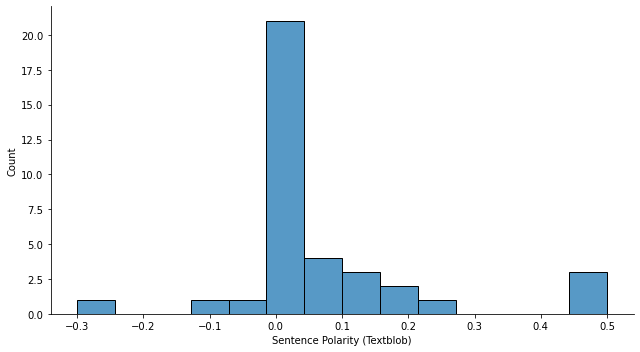

In [31]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

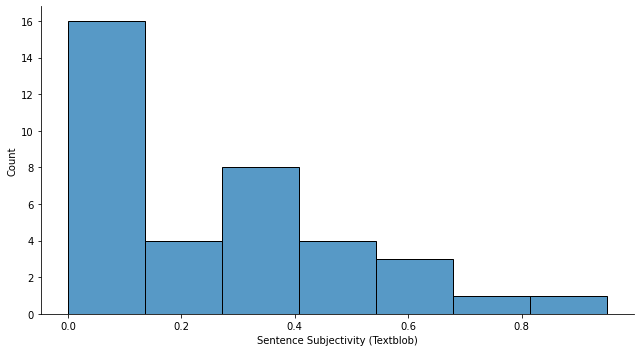

In [32]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [33]:
pattern_sentiment=[]

for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    
    pattern_sentiment.append([s,c,d])

In [34]:
pattern_sentiment[1]

['newsynewsU.S. NewsWorldLifePoliticsScience HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us      Science and HealthHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a dozen private companies to launch new space stations.',
 0.009090909090909087,
 0.3073863636363636]

In [35]:
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [36]:
df_pattern.head()

,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.000000,0.000000
1,newsynewsU.S. NewsWorldLifePoliticsScience Hea...,0.009091,0.307386
2,How Commercial Companies Are Advancing Space E...,0.040000,0.600000
3,Newly released video shows the Starship liftin...,0.136364,0.454545
4,SpaceX hopes the ship will reach orbit for the...,0.125000,0.166667


In [37]:
df_pattern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      37 non-null     object 
 1   Polarity      37 non-null     float64
 2   Subjectivity  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


Text(0.5, 6.79999999999999, 'Sentence Polarity (Pattern)')

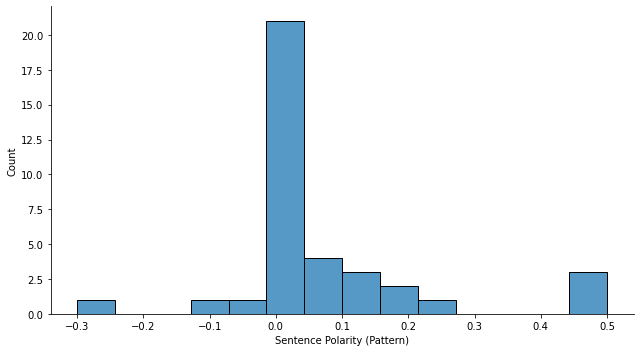

In [38]:
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Pattern)')

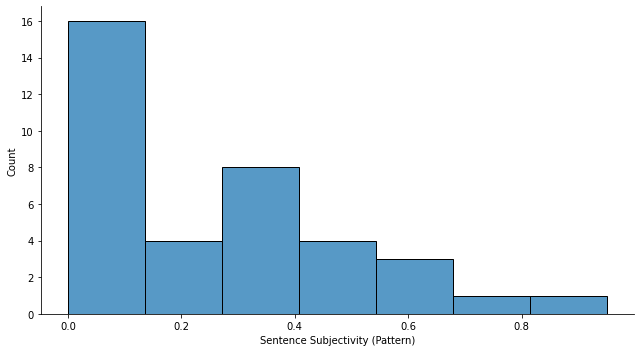

In [39]:
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")

In [40]:
clean_text[100:300]

'e HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us      Science and HealthHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a doz'

In [41]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [42]:
#Tokenizing the text
tokens = tokenizer.tokenize(clean_text)

In [43]:
len(tokens)

765

In [44]:
print(tokens[0:10])

['Commercial', 'Companies', 'Advance', 'Space', 'Exploration', 'VIDEO', 'newsynewsU', 'S', 'NewsWorldLifePoliticsScience', 'HealthTechBusinessEntertainmentSportsMental']


In [45]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [46]:
len(words)

765

In [47]:
print(words[0:10])

['commercial', 'companies', 'advance', 'space', 'exploration', 'video', 'newsynewsu', 's', 'newsworldlifepoliticsscience', 'healthtechbusinessentertainmentsportsmental']


In [48]:
stopwords = nltk.corpus.stopwords.words('english')

In [49]:
#Now we need to remove the stop words from the words variable

#A new list to hold Moby Dick with No Stop words
words_new = []

#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [50]:
len(words_new)

480

In [51]:
print(words_new[0:10])

['commercial', 'companies', 'advance', 'space', 'exploration', 'video', 'newsynewsu', 'newsworldlifepoliticsscience', 'healthtechbusinessentertainmentsportsmental', 'healthshowswatch']


In [52]:
freq_dist = nltk.FreqDist(words_new)

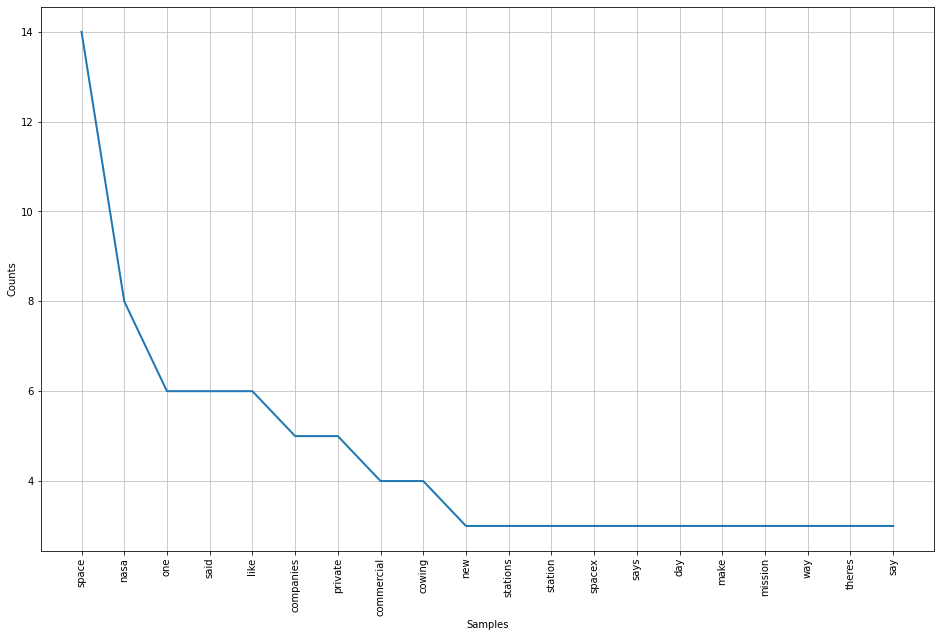

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)

In [54]:
#converting into string

res=' '.join([i for i in words_new if not i.isdigit()]) 

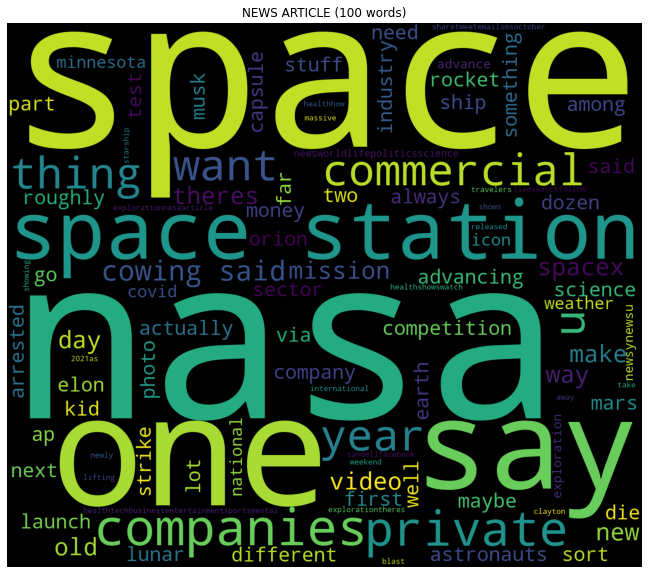

In [55]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()